In [21]:
import pandas as pd
import os
from pathlib import Path

file_path = Path("../dataset/01_MRI_Data")

There are 48346 images in the dataset?? (More than 1 compared to the content mentioned in the paper)

In [22]:
img_files = []
for root, dirs, files in os.walk(file_path):
    # print(root, dirs, files)
    if files != []:
        img_files = img_files + [Path(os.path.join(root, file)) for file in files]
print(len(img_files))
print(img_files[:300])

48346
[PosixPath('../dataset/01_MRI_Data/0389/L-SPINE_LSS_20160102_103754_923000/T2_TSE_TRA_384_0004/T2_TSE_TRA__0389_008.ima'), PosixPath('../dataset/01_MRI_Data/0389/L-SPINE_LSS_20160102_103754_923000/T2_TSE_TRA_384_0004/T2_TSE_TRA__0389_009.ima'), PosixPath('../dataset/01_MRI_Data/0389/L-SPINE_LSS_20160102_103754_923000/T2_TSE_TRA_384_0004/T2_TSE_TRA__0389_013.ima'), PosixPath('../dataset/01_MRI_Data/0389/L-SPINE_LSS_20160102_103754_923000/T2_TSE_TRA_384_0004/T2_TSE_TRA__0389_007.ima'), PosixPath('../dataset/01_MRI_Data/0389/L-SPINE_LSS_20160102_103754_923000/T2_TSE_TRA_384_0004/T2_TSE_TRA__0389_006.ima'), PosixPath('../dataset/01_MRI_Data/0389/L-SPINE_LSS_20160102_103754_923000/T2_TSE_TRA_384_0004/T2_TSE_TRA__0389_012.ima'), PosixPath('../dataset/01_MRI_Data/0389/L-SPINE_LSS_20160102_103754_923000/T2_TSE_TRA_384_0004/T2_TSE_TRA__0389_004.ima'), PosixPath('../dataset/01_MRI_Data/0389/L-SPINE_LSS_20160102_103754_923000/T2_TSE_TRA_384_0004/T2_TSE_TRA__0389_010.ima'), PosixPath('../dat

Each image offer a wide variety of information such as: 
- Image type --> check against other image
- Study time --> check against the image name
- Series time --> check against the image name
- Study description --> check against the folder name
- Series description --> check again the folder name
- Patient;s Sex, Age, Size and Weight
- Body Part examined: LSPine
- Scan Options: SAT1
- Series number, acquisition number, instance number: 4, 1, 8
- Rows, Columns: 320
- Requested Procedure Description: l-spine lss
- Pixel Data

In [26]:
import pydicom

ds = pydicom.dcmread(img_files[0])
print(ds)


Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 210
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.9590.100.1.2.324679177913115081604069914903539571208
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.3.6.1.4.1.9590.100.1.3.100.9.4
(0002,0013) Implementation Version Name         SH: 'MATLAB IPT 9.4'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M', 'NORM', 'DIS2D', 'FM2_2', 'FIL']
(0008,0012) Instance Creation Date              DA: ''
(0008,0013) Instance Creation Time              TM: '104945.358000'
(0008,0016) SOP Class UID                       UI: MR Image

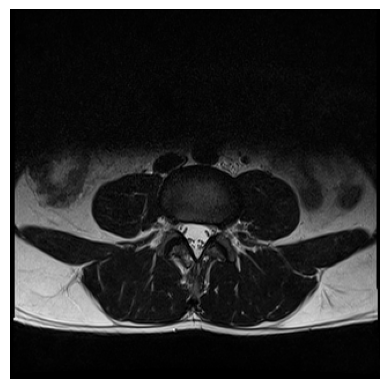

(320, 320)


In [24]:
import matplotlib.pyplot as plt

image = ds.pixel_array

plt.imshow(image, cmap="gray")
plt.axis("off")   # hides axis numbers
plt.show()

print(image.shape)
